In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('範例檔案-HW_010/data/house_train.csv.gz')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
num_feature=[]

for dtype, feature in zip (df.dtypes, df.columns):
    if dtype=='float64' or dtype=='int64':
        num_feature.append(feature)

print(f'{len(num_feature)} Numeric Features: {num_feature}')

38 Numeric Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [5]:
n_df=df[num_feature]
n_df=n_df.fillna(-1)
n_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


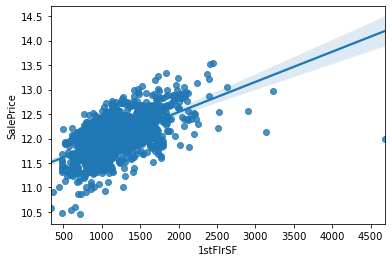

In [7]:
train_y=np.log1p(df['SalePrice'])
sns.regplot(x=n_df['1stFlrSF'] , y=train_y )
plt.show()

In [9]:
scaler=MinMaxScaler()
train_x=scaler.fit_transform(n_df)
print(train_x)
estimator=LinearRegression()
cross_val_score(estimator,train_x, train_y,cv=5).mean()

[[0.00000000e+00 2.35294118e-01 2.10191083e-01 ... 9.09090909e-02
  5.00000000e-01 2.41077628e-01]
 [6.85400960e-04 0.00000000e+00 2.57961783e-01 ... 3.63636364e-01
  2.50000000e-01 2.03582836e-01]
 [1.37080192e-03 2.35294118e-01 2.19745223e-01 ... 7.27272727e-01
  5.00000000e-01 2.61908068e-01]
 ...
 [9.98629198e-01 2.94117647e-01 2.13375796e-01 ... 3.63636364e-01
  1.00000000e+00 3.21621997e-01]
 [9.99314599e-01 0.00000000e+00 2.19745223e-01 ... 2.72727273e-01
  1.00000000e+00 1.48902930e-01]
 [1.00000000e+00 0.00000000e+00 2.42038217e-01 ... 4.54545455e-01
  5.00000000e-01 1.56367171e-01]]


0.9390143474725281

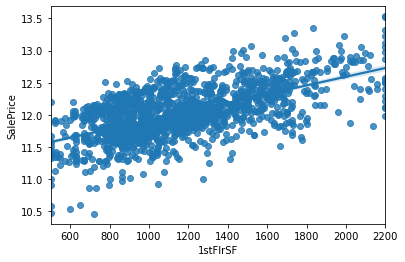

0.9437998054067736

In [10]:
c_n_df=n_df
c_n_df['1stFlrSF']=n_df['1stFlrSF'].clip(500,2200)
sns.regplot(x=c_n_df['1stFlrSF'],y=train_y)
plt.show()
train_x=scaler.fit_transform(c_n_df)
cross_val_score(estimator,train_x, train_y,cv=5).mean()

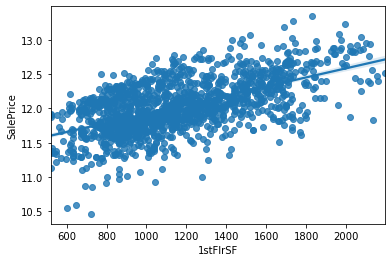

In [13]:
keep_ind=(n_df['1stFlrSF']>500)&(n_df['1stFlrSF']<2200)
train_x=n_df[keep_ind]
train_y=train_y[keep_ind]
sns.regplot(x=train_x['1stFlrSF'],y=train_y)
plt.show()

In [14]:
train_x=scaler.fit_transform(train_x)
cross_val_score(estimator,train_x, train_y,cv=5).mean()

0.9515020043124978

In [ ]:
調整離群值與捨棄離群值皆可以增加linear regression的fitting程度。但離群值可能有其含義，故若知離群值離群原因，亦需要納入考量。